# Height prediction using polynomial regression

## Importing the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Importing the data:

In [2]:
data = pd.read_csv("HeightVsWeight.csv")
data.tail()

,Age,Height
66,76,204
67,77,205
68,78,206
69,79,207
70,80,208


## EDA & Preprocessing:

In [3]:
data.isnull().sum()

Age       0
Height    0
dtype: int64

In [4]:
X = data.Age
Y = data.Height

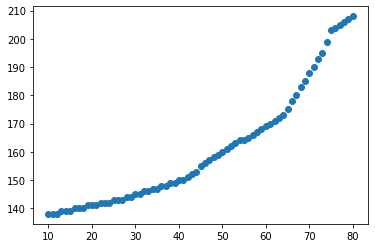

In [5]:
plt.scatter(X, Y)

### Splitting the data in train and test set:

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=40)

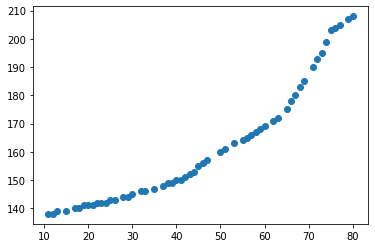

In [7]:
# Visualizing train set

plt.scatter(x_train, y_train)

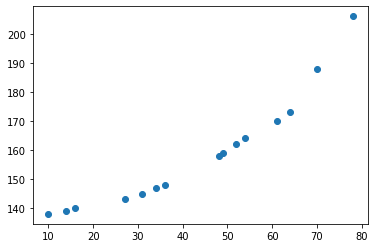

In [8]:
# Visualizing test set

plt.scatter(x_test, y_test)

### Making functions to plot the model and print the R-squared:

In [9]:
def plot_model(model, x, y):

    line_data = pd.DataFrame(list(zip(np.array(x), model(x))), columns=["x","predicted_y"])
    sorted_line_data = line_data.sort_values(by=["x"])
    plt.scatter(x, y)
    plt.plot(sorted_line_data.x, sorted_line_data.predicted_y, c="r")
    plt.show()

In [10]:
def print_r2(y, y_hat):
    poly_r2 = r2_score(y, y_hat)
    print(poly_r2)

## Making the model:

### 3rd order polnomial:

In [11]:
poly_order_3 = np.poly1d(np.polyfit(x_train, y_train, 3))

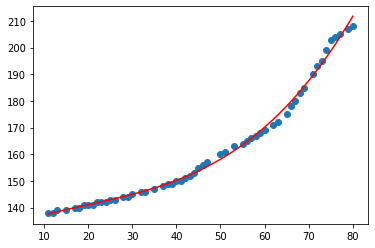

In [12]:
plot_model(poly_order_3, x_train, y_train)

In [13]:
print_r2(y_train, poly_order_3(x_train))

0.9957615108221524


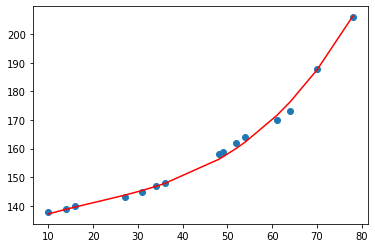

In [14]:
plot_model(poly_order_3, x_test, y_test)

In [15]:
print_r2(y_test, poly_order_3(x_test))

0.994647411347019


### 4th order polnomial:

In [16]:
poly_order_4 = np.poly1d(np.polyfit(x_train, y_train, 4))

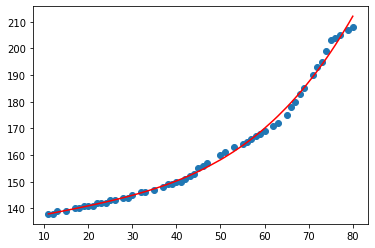

In [17]:
plot_model(poly_order_4, x_train, y_train)

In [27]:
print_r2(y_train, poly_order_4(x_train))

0.9957979062105692


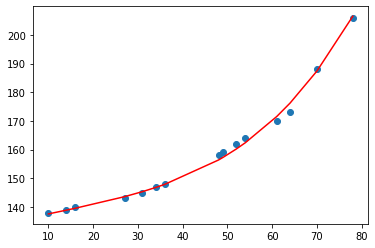

In [28]:
plot_model(poly_order_4, x_test, y_test)

In [18]:
print_r2(y_test, poly_order_4(x_test))

0.995197389105984


### 5th order polnomial:

In [26]:
poly_order_5 = np.poly1d(np.polyfit(x_train, y_train, 5))

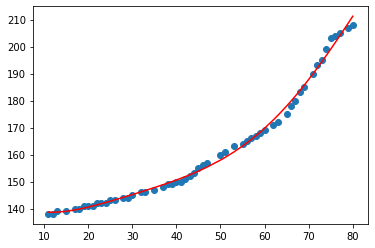

In [20]:
plot_model(poly_order_5, x_train, y_train)

In [22]:
print_r2(y_train, poly_order_5(x_train))

0.9960573783536837


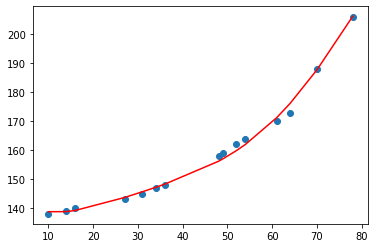

In [23]:
plot_model(poly_order_5, x_test, y_test)

In [25]:
print_r2(y_test, poly_order_5(x_test))

0.9943985802566033


##### We can observe that the higher the order of the polynomial the higher the possibility of overfitting the model. So, we can choose the model with the help of R-squared and by visualizing the line.